In [3]:
import matplotlib.pyplot as plt
import requests
from datetime import datetime
import time
import pandas as pd
from tqdm import tqdm
import pymysql
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [4]:
plt.style.use("ggplot")

In [5]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [6]:
db = pymysql.connect(
    host='localhost',
    port=3306,
    user='root',
    passwd='yourPassword',
    db='coin_db',
    charset='utf8'
)

In [7]:
sql = "SELECT open_time as ds, close_price as y FROM coin_tbl;"

In [8]:
bitcoin_df = pd.read_sql(sql, db)

C:\Users\tjk\AppData\Local\Temp\ipykernel_3880\1041689760.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bitcoin_df = pd.read_sql(sql, db)


In [9]:
bitcoin_df

ds         y
0     2023-09-15 00:00:00  26699.99
1     2023-09-15 00:01:00  26677.36
2     2023-09-15 00:02:00  26696.84
3     2023-09-15 00:03:00  26697.46
4     2023-09-15 00:04:00  26661.38
...                   ...       ...
16466 2023-09-26 10:26:00  26263.47
16467 2023-09-26 10:27:00  26265.50
16468 2023-09-26 10:28:00  26269.15
16469 2023-09-26 10:29:00  26269.15
16470 2023-09-26 10:30:00  26267.48

[16471 rows x 2 columns]

In [10]:
bitcoin_df.shape

(16471, 2)

In [11]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16471 entries, 0 to 16470
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      16471 non-null  datetime64[ns]
 1   y       16471 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 257.5 KB


In [12]:
bitcoin_df.set_index('ds', inplace=True)

In [13]:
bitcoin_df.describe()

y
count  16471.000000
mean   26661.606888
std      280.641432
min    26023.160000
25%    26528.250000
50%    26585.310000
75%    26759.885000
max    27477.000000

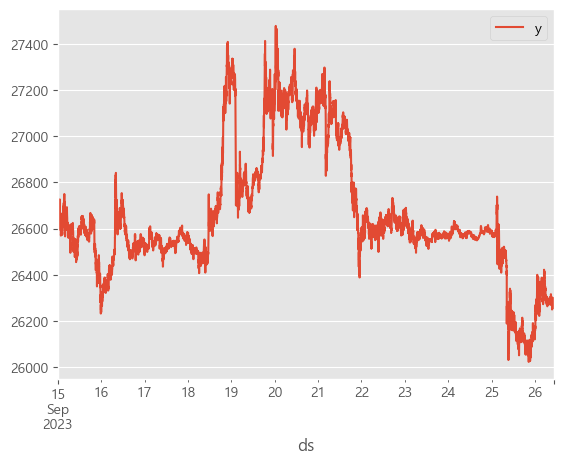

In [14]:
bitcoin_df.plot()
plt.show()

In [15]:
bitcoin_df.reset_index(inplace=True)

In [16]:
bitcoin_df

ds         y
0     2023-09-15 00:00:00  26699.99
1     2023-09-15 00:01:00  26677.36
2     2023-09-15 00:02:00  26696.84
3     2023-09-15 00:03:00  26697.46
4     2023-09-15 00:04:00  26661.38
...                   ...       ...
16466 2023-09-26 10:26:00  26263.47
16467 2023-09-26 10:27:00  26265.50
16468 2023-09-26 10:28:00  26269.15
16469 2023-09-26 10:29:00  26269.15
16470 2023-09-26 10:30:00  26267.48

[16471 rows x 2 columns]

In [17]:
prophet = Prophet(
    seasonality_mode='multiplicative', # 트렌드 반영
    yearly_seasonality=True, # 연간 트렌드 반영
    weekly_seasonality=True, # 주간 트렌드 반영
    daily_seasonality=True, # 일간 트렌드 반영
    changepoint_prior_scale=0.5 # 트렌드 반영 비율
)

In [18]:
prophet.fit(bitcoin_df)

15:42:49 - cmdstanpy - INFO - Chain [1] start processing
15:43:16 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
# 1분에 60개의 데이터를 예측하도록 설정
future_data = prophet.make_future_dataframe(periods=60, freq='min')

In [20]:
forecast_data = prophet.predict(future_data)

In [21]:
forecast_data.tail(60)

ds         trend  ...  additive_terms_upper          yhat
16471 2023-09-26 10:31:00  13908.074127  ...                   0.0  26357.512142
16472 2023-09-26 10:32:00  13908.458991  ...                   0.0  26357.953692
16473 2023-09-26 10:33:00  13908.843854  ...                   0.0  26358.401748
16474 2023-09-26 10:34:00  13909.228718  ...                   0.0  26358.856332
16475 2023-09-26 10:35:00  13909.613581  ...                   0.0  26359.317463
16476 2023-09-26 10:36:00  13909.998445  ...                   0.0  26359.785160
16477 2023-09-26 10:37:00  13910.383308  ...                   0.0  26360.259441
16478 2023-09-26 10:38:00  13910.768172  ...                   0.0  26360.740321
16479 2023-09-26 10:39:00  13911.153035  ...                   0.0  26361.227813
16480 2023-09-26 10:40:00  13911.537899  ...                   0.0  26361.721931
16481 2023-09-26 10:41:00  13911.922762  ...                   0.0  26362.222683
16482 2023-09-26 10:42:00  13912.307626  ...                   0.0  26362.730081
16483 2023-09-26 10:43:00  13912.692490  ...                   0.0  26363.244130
16484 2023-09-26 10:44:00  13913.077353  ...                   0.0  26363.764837
16485 2023-09-26 10:45:00  13913.462217  ...                   0.0  26364.292206
16486 2023-09-26 10:46:00  13913.847080  ...                   0.0  26364.826238
16487 2023-09-26 10:47:00  13914.231944  ...                   0.0  26365.366936
16488 2023-09-26 10:48:00  13914.616807  ...                   0.0  26365.914299
16489 2023-09-26 10:49:00  13915.001671  ...                   0.0  26366.468323
16490 2023-09-26 10:50:00  13915.386534  ...                   0.0  26367.029006
16491 2023-09-26 10:51:00  13915.771398  ...                   0.0  26367.596341
16492 2023-09-26 10:52:00  13916.156261  ...                   0.0  26368.170322
16493 2023-09-26 10:53:00  13916.541125  ...                   0.0  26368.750939
16494 2023-09-26 10:54:00  13916.925988  ...                   0.0  26369.338183
16495 2023-09-26 10:55:00  13917.310852  ...                   0.0  26369.932041
16496 2023-09-26 10:56:00  13917.695715  ...                   0.0  26370.532501
16497 2023-09-26 10:57:00  13918.080579  ...                   0.0  26371.139546
16498 2023-09-26 10:58:00  13918.465442  ...                   0.0  26371.753160
16499 2023-09-26 10:59:00  13918.850306  ...                   0.0  26372.373326
16500 2023-09-26 11:00:00  13919.235169  ...                   0.0  26373.000022
16501 2023-09-26 11:01:00  13919.620033  ...                   0.0  26373.633229
16502 2023-09-26 11:02:00  13920.004896  ...                   0.0  26374.272923
16503 2023-09-26 11:03:00  13920.389760  ...                   0.0  26374.919080
16504 2023-09-26 11:04:00  13920.774623  ...                   0.0  26375.571674
16505 2023-09-26 11:05:00  13921.159487  ...                   0.0  26376.230677
16506 2023-09-26 11:06:00  13921.544350  ...                   0.0  26376.896062
16507 2023-09-26 11:07:00  13921.929214  ...                   0.0  26377.567796
16508 2023-09-26 11:08:00  13922.314077  ...                   0.0  26378.245850
16509 2023-09-26 11:09:00  13922.698941  ...                   0.0  26378.930189
16510 2023-09-26 11:10:00  13923.083804  ...                   0.0  26379.620778
16511 2023-09-26 11:11:00  13923.468668  ...                   0.0  26380.317582
16512 2023-09-26 11:12:00  13923.853531  ...                   0.0  26381.020563
16513 2023-09-26 11:13:00  13924.238395  ...                   0.0  26381.729681
16514 2023-09-26 11:14:00  13924.623258  ...                   0.0  26382.444898
16515 2023-09-26 11:15:00  13925.008122  ...                   0.0  26383.166170
16516 2023-09-26 11:16:00  13925.392986  ...                   0.0  26383.893456
16517 2023-09-26 11:17:00  13925.777849  ...                   0.0  26384.626709
16518 2023-09-26 11:18:00  13926.162713  ...                   0.0  26385.365886
16519 2023-09-26 11:19:00  13926.547576  ...          

In [22]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(60)

ds          yhat    yhat_lower    yhat_upper
16471 2023-09-26 10:31:00  26357.512142  26276.894669  26435.693137
16472 2023-09-26 10:32:00  26357.953692  26281.647216  26435.311025
16473 2023-09-26 10:33:00  26358.401748  26283.193924  26445.178215
16474 2023-09-26 10:34:00  26358.856332  26282.171347  26436.048514
16475 2023-09-26 10:35:00  26359.317463  26276.868980  26439.827139
16476 2023-09-26 10:36:00  26359.785160  26285.530175  26443.443377
16477 2023-09-26 10:37:00  26360.259441  26283.564021  26439.943857
16478 2023-09-26 10:38:00  26360.740321  26282.936238  26437.916632
16479 2023-09-26 10:39:00  26361.227813  26285.131010  26440.005491
16480 2023-09-26 10:40:00  26361.721931  26278.005152  26438.682155
16481 2023-09-26 10:41:00  26362.222683  26286.106364  26435.492453
16482 2023-09-26 10:42:00  26362.730081  26286.982526  26443.559703
16483 2023-09-26 10:43:00  26363.244130  26284.386500  26443.312235
16484 2023-09-26 10:44:00  26363.764837  26284.537652  26447.304414
16485 2023-09-26 10:45:00  26364.292206  26290.484186  26445.698137
16486 2023-09-26 10:46:00  26364.826238  26290.031642  26439.848644
16487 2023-09-26 10:47:00  26365.366936  26291.371632  26444.784533
16488 2023-09-26 10:48:00  26365.914299  26279.636448  26444.091924
16489 2023-09-26 10:49:00  26366.468323  26284.522426  26438.143838
16490 2023-09-26 10:50:00  26367.029006  26288.499652  26445.075073
16491 2023-09-26 10:51:00  26367.596341  26289.666616  26443.320547
16492 2023-09-26 10:52:00  26368.170322  26288.329620  26448.138519
16493 2023-09-26 10:53:00  26368.750939  26288.297304  26444.473639
16494 2023-09-26 10:54:00  26369.338183  26292.696809  26450.863528
16495 2023-09-26 10:55:00  26369.932041  26292.787198  26445.353924
16496 2023-09-26 10:56:00  26370.532501  26292.634384  26446.826294
16497 2023-09-26 10:57:00  26371.139546  26294.183902  26452.571838
16498 2023-09-26 10:58:00  26371.753160  26286.220582  26447.509326
16499 2023-09-26 10:59:00  26372.373326  26298.789875  26453.316626
16500 2023-09-26 11:00:00  26373.000022  26291.087836  26454.087352
16501 2023-09-26 11:01:00  26373.633229  26297.749310  26458.732404
16502 2023-09-26 11:02:00  26374.272923  26297.748429  26452.459872
16503 2023-09-26 11:03:00  26374.919080  26296.370265  26457.384501
16504 2023-09-26 11:04:00  26375.571674  26299.951868  26451.005304
16505 2023-09-26 11:05:00  26376.230677  26303.317556  26459.799532
16506 2023-09-26 11:06:00  26376.896062  26303.935890  26455.914916
16507 2023-09-26 11:07:00  26377.567796  26299.980103  26460.206382
16508 2023-09-26 11:08:00  26378.245850  26295.007564  26462.798134
16509 2023-09-26 11:09:00  26378.930189  26295.849526  26461.151256
16510 2023-09-26 11:10:00  26379.620778  26302.483368  26462.637851
16511 2023-09-26 11:11:00  26380.317582  26303.685879  26454.177021
16512 2023-09-26 11:12:00  26381.020563  26299.590421  26457.872659
16513 2023-09-26 11:13:00  26381.729681  26304.471503  26456.256275
16514 2023-09-26 11:14:00  26382.444898  26302.553652  26458.697320
16515 2023-09-26 11:15:00  26383.166170  26310.205615  26467.950231
16516 2023-09-26 11:16:00  26383.893456  26305.618423  26468.351900
16517 2023-09-26 11:17:00  26384.626709  26301.549912  26461.909000
16518 2023-09-26 11:18:00  26385.365886  26304.897320  26471.901087
16519 2023-09-26 11:19:00  26386.110938  26306.079392  26467.303991
16520 2023-09-26 11:20:00  26386.861817  26311.120989  26467.668119
16521 2023-09-26 11:21:00  26387.618474  26309.621963  26467.289336
16522 2023-09-26 11:22:00  26388.380858  26306.922059  26475.746340
16523 2023-09-26 11:23:00  26389.148916  26308.577838  26466.373470
16524 2023-09-26 11:24:00  26389.922596  26313.114996  26477.700331
16525 2023-09-26 11:25:00  26390.701842  26312.344316  26471.577812
16526 2023-09-26 11:26:00  26391.486599  26312.190758  26465.126599
16527 2023-09-26 11:27:00  26392.276810  26319.514718  26474.129868
16528 2023-09-26 11:28:00  26393.072418  26315.841452  26474.968510
16529 2023-

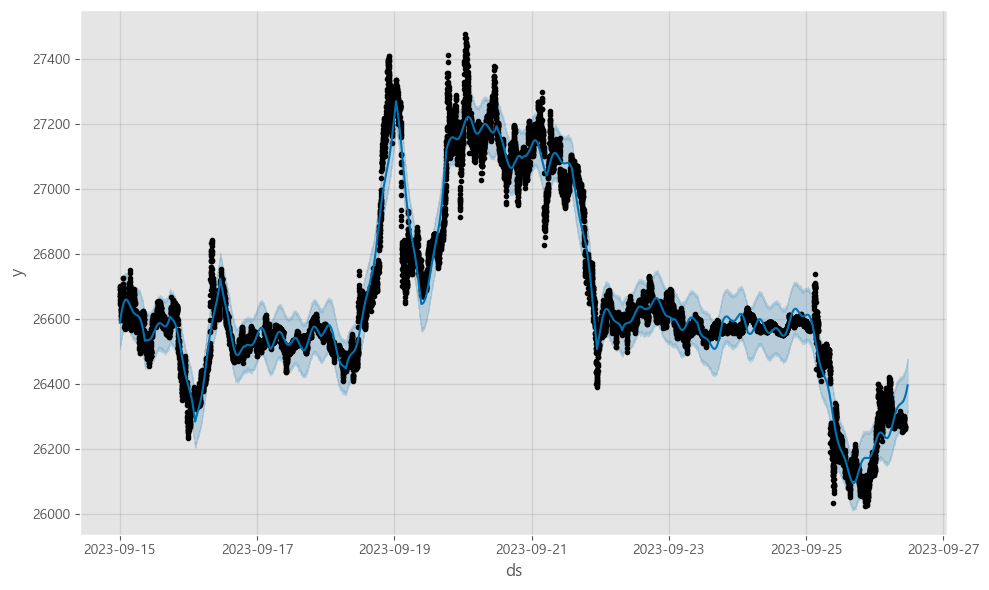

In [23]:
fig1 = prophet.plot(forecast_data)

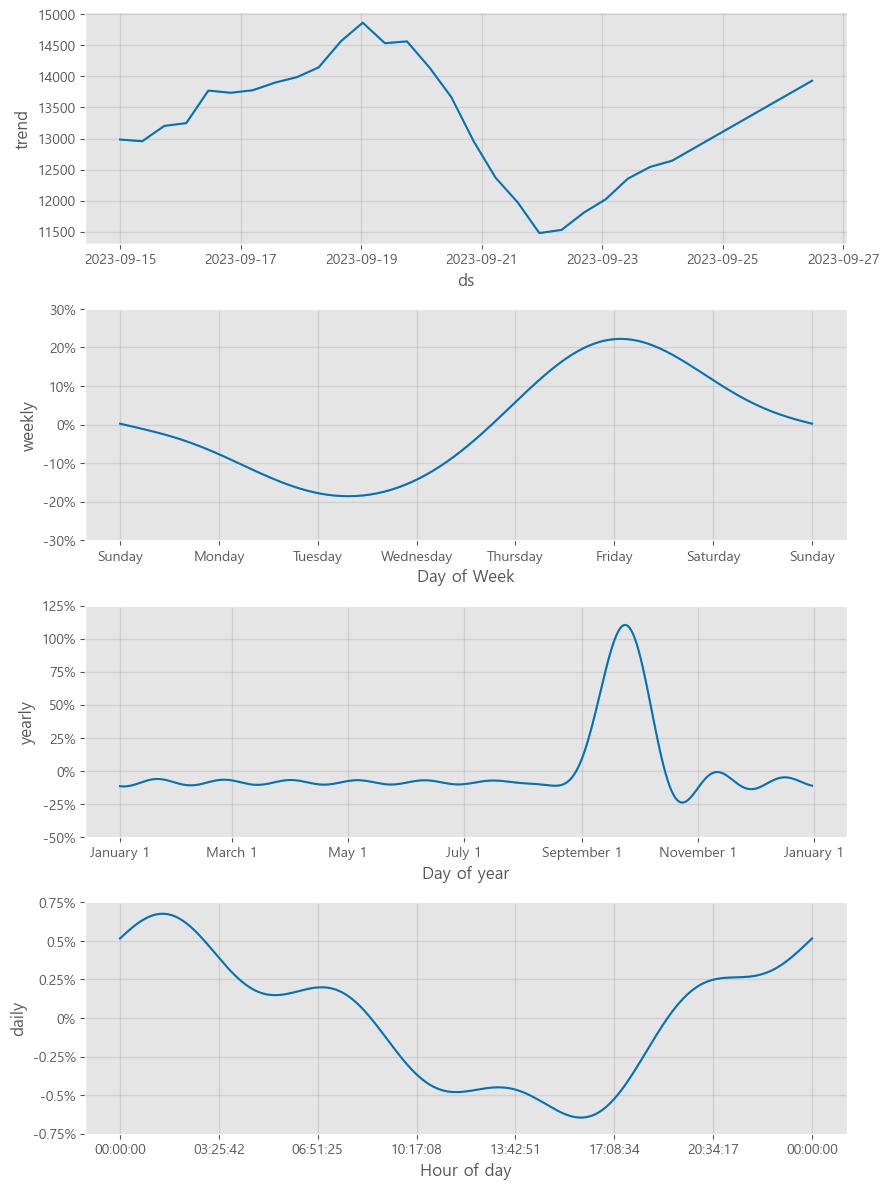

In [24]:
fig2 = prophet.plot_components(forecast_data)

In [26]:
pred_y = forecast_data.yhat.values
test_y = bitcoin_df.y.values
pred_y_lower = forecast_data.yhat_lower.values
pred_y_upper = forecast_data.yhat_upper.values

In [27]:
rmse = sqrt(mean_squared_error(test_y, pred_y[:-60]))
print(rmse)

61.88302482501552


In [28]:
r2_score(test_y, pred_y[:-60])

0.9513743006124367

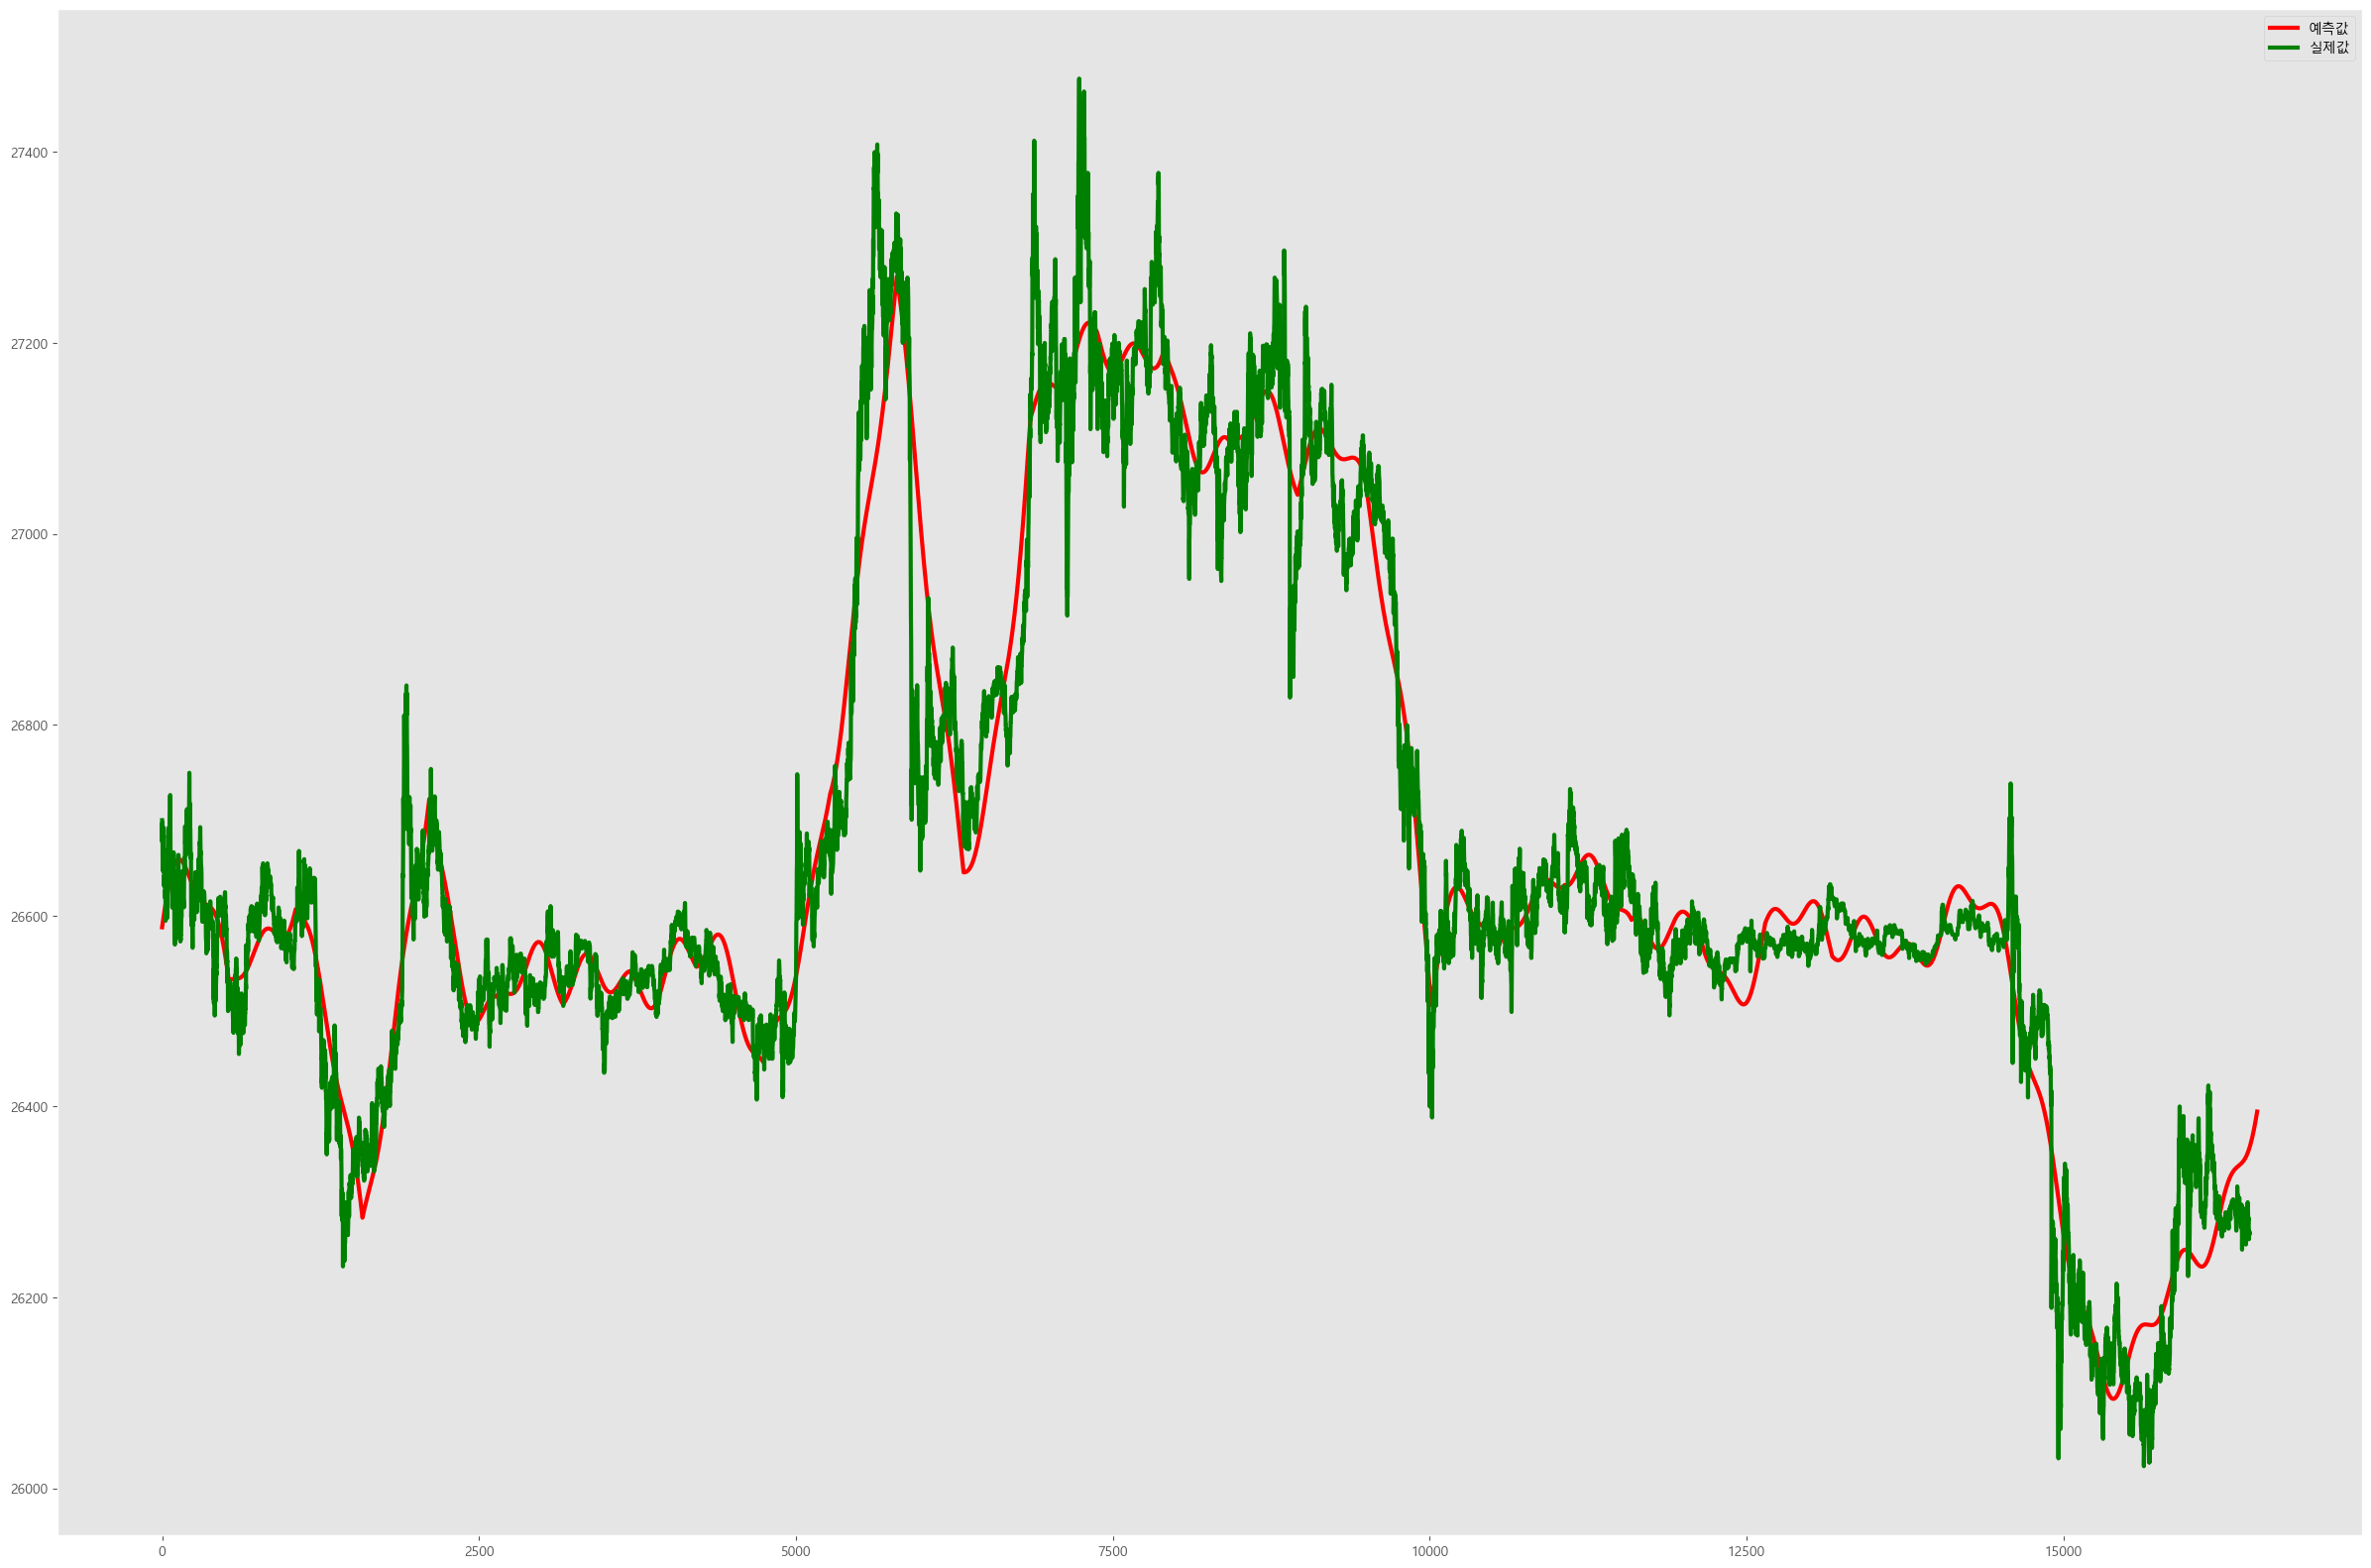

In [29]:
plt.figure(figsize=(30, 20))
plt.plot(pred_y, color='red', label="예측값", lw=3.0)
plt.plot(test_y, color='green', label="실제값", lw=3.0)
plt.legend()
plt.grid()
plt.show()

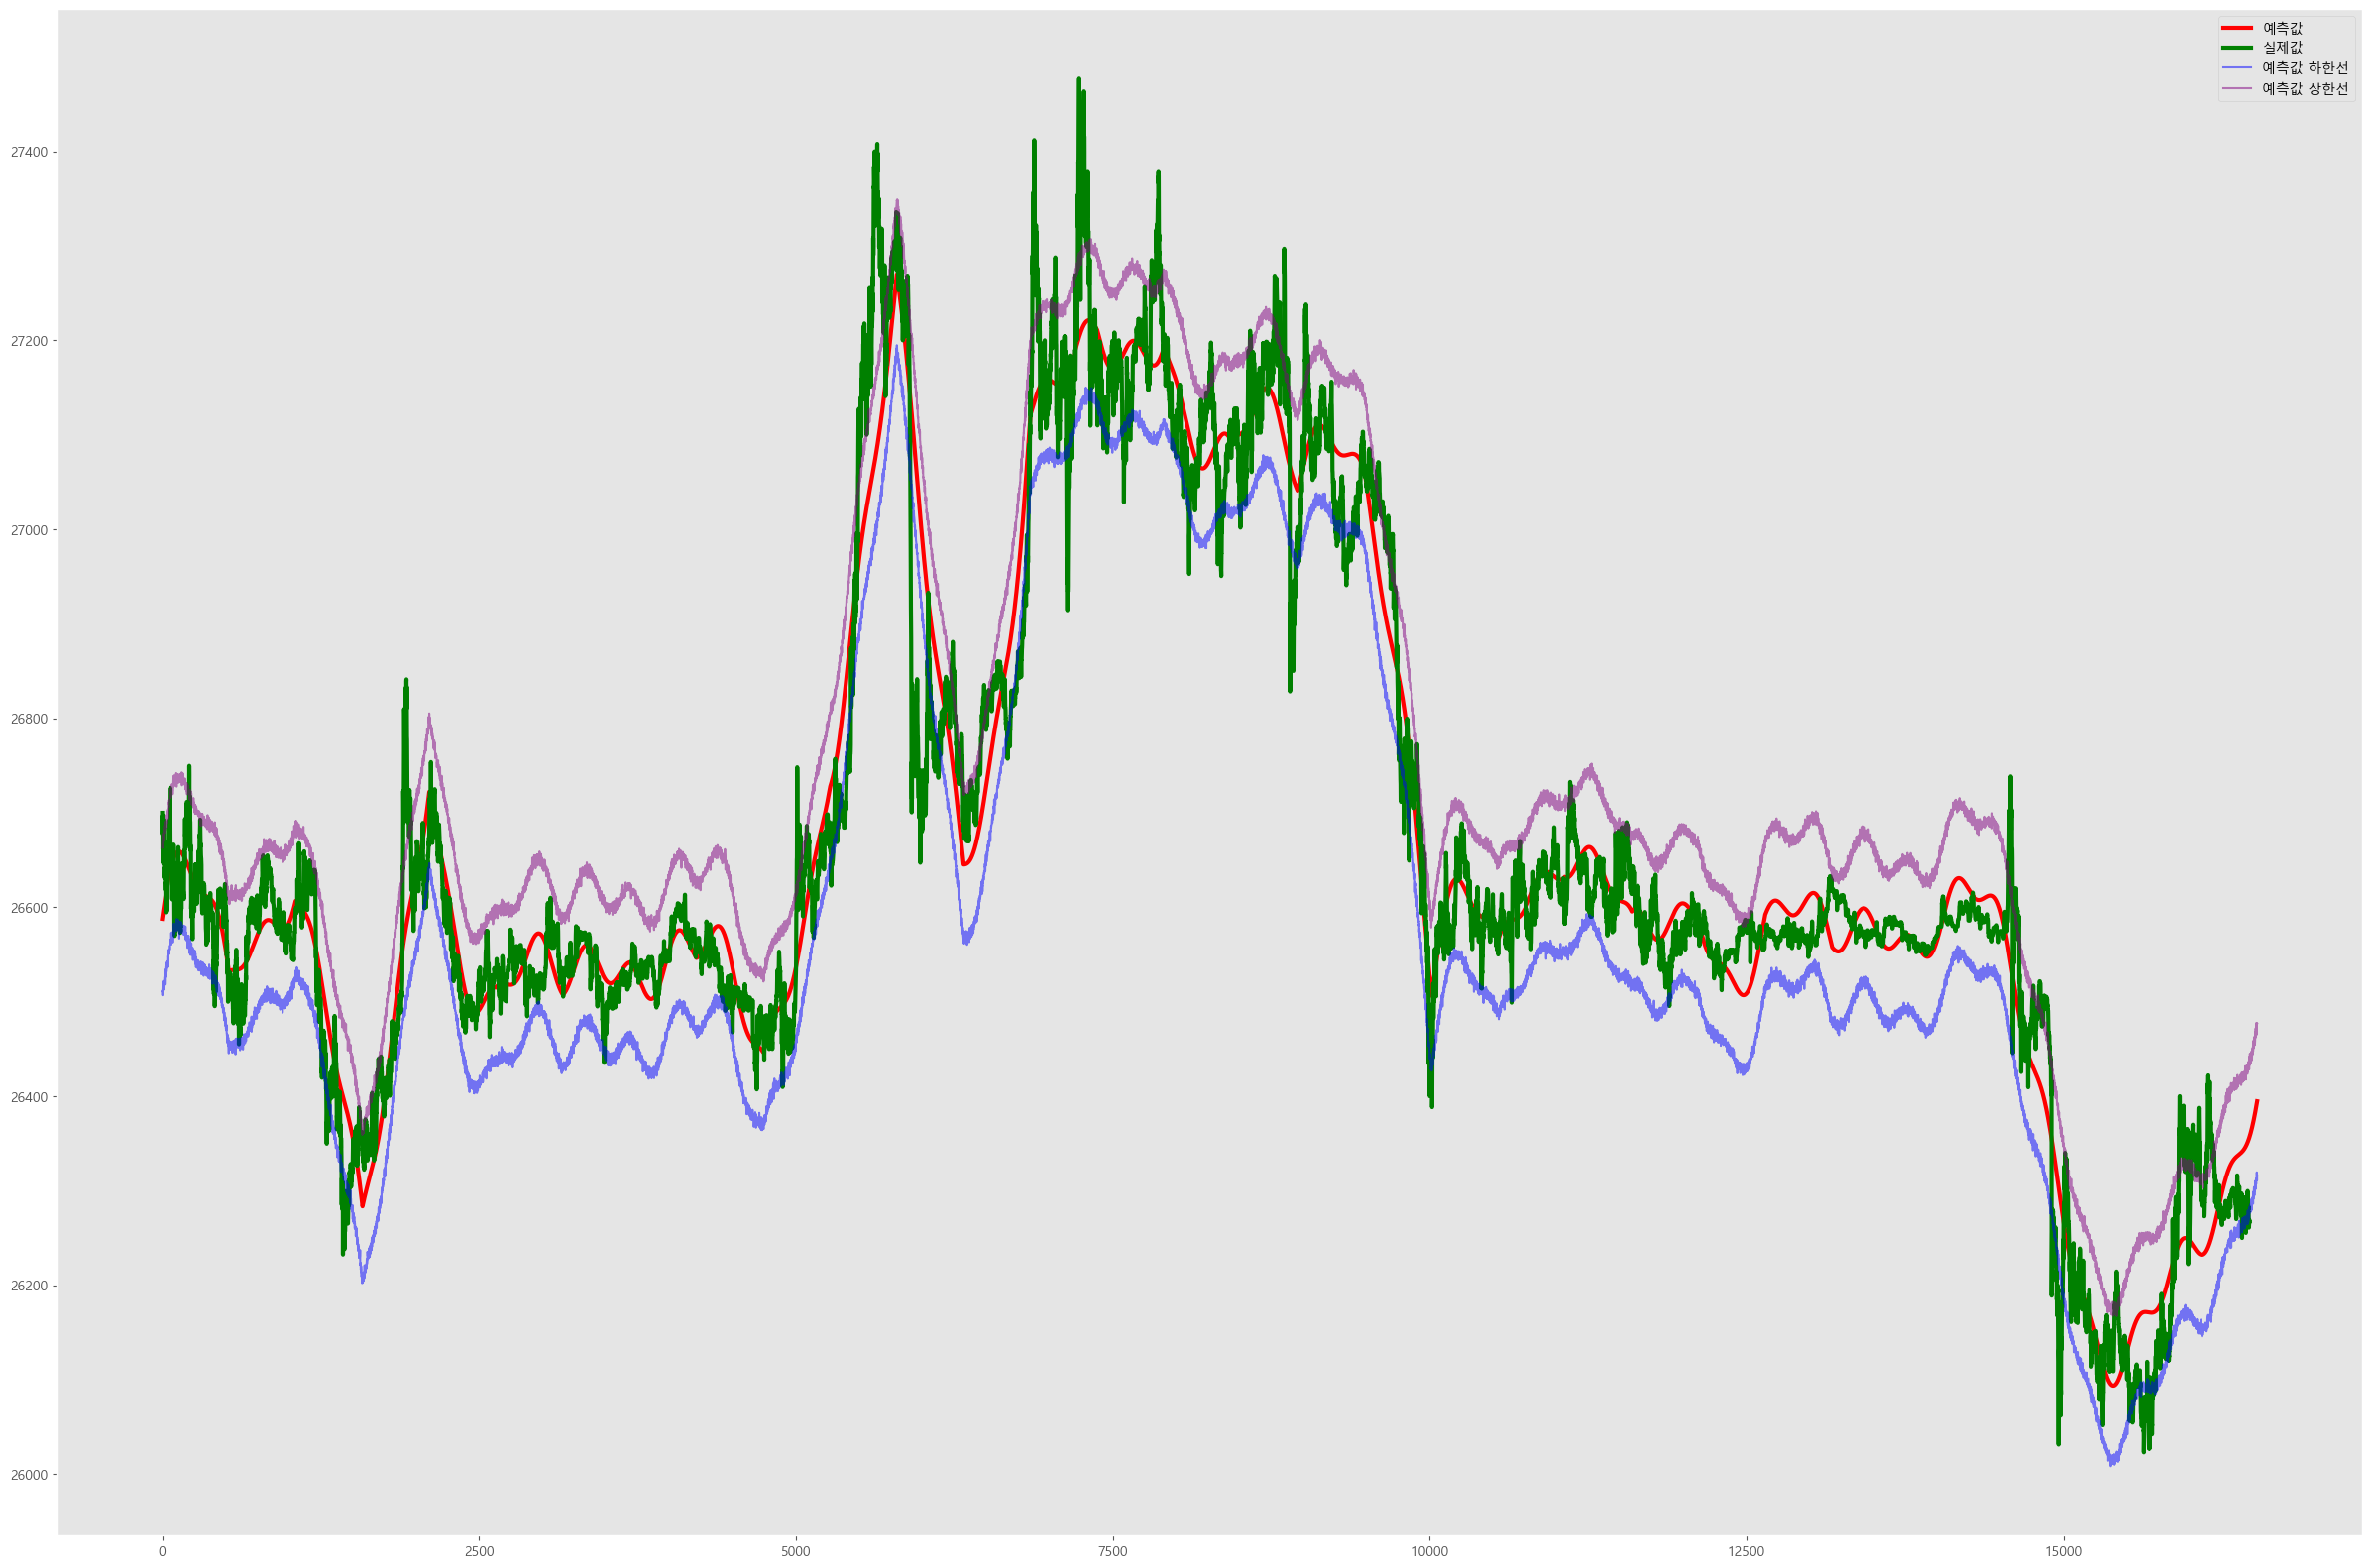

In [30]:
plt.figure(figsize=(30, 20))
plt.plot(pred_y, color='red', label="예측값", lw=3.0)
plt.plot(test_y, color='green', label="실제값", lw=3.0)
plt.plot(pred_y_lower, color='blue', label="예측값 하한선", alpha=0.5)
plt.plot(pred_y_upper, color='purple', label="예측값 상한선", alpha=0.5)
plt.legend()
plt.grid()
plt.show()

In [31]:
len(bitcoin_df)

16471

In [32]:
df_count = len(bitcoin_df)

In [33]:
cursor = db.cursor()

In [39]:
for index in range(df_count):
    open_date = bitcoin_df.loc[index, 'ds']
    print("open_date =", open_date)
    predict_price = forecast_data.loc[index, 'yhat']
    print("predict_price =", predict_price)
    
    sql = "UPDATE coin_tbl SET predic_price=%s WHERE open_time=%s"
    
    cursor.execute(sql, (predict_price, open_date))
    db.commit()
    print("=" * 100)

open_date = 2023-09-15 00:00:00
predict_price = 26587.77825440592
open_date = 2023-09-15 00:01:00
predict_price = 26588.729957717933
open_date = 2023-09-15 00:02:00
predict_price = 26589.67862150065
open_date = 2023-09-15 00:03:00
predict_price = 26590.62415442624
open_date = 2023-09-15 00:04:00
predict_price = 26591.566465050753
open_date = 2023-09-15 00:05:00
predict_price = 26592.50546176988
open_date = 2023-09-15 00:06:00
predict_price = 26593.44105290604
open_date = 2023-09-15 00:07:00
predict_price = 26594.373146701913
open_date = 2023-09-15 00:08:00
predict_price = 26595.30165135111
open_date = 2023-09-15 00:09:00
predict_price = 26596.226475043888
open_date = 2023-09-15 00:10:00
predict_price = 26597.1475259804
open_date = 2023-09-15 00:11:00
predict_price = 26598.06471239817
open_date = 2023-09-15 00:12:00
predict_price = 26598.977942616584
open_date = 2023-09-15 00:13:00
predict_price = 26599.88712503865
open_date = 2023-09-15 00:14:00
predict_price = 26600.792168207594
open_

In [40]:
db.close()